<a href="https://colab.research.google.com/github/abhyudyasangwan/fraud_detection/blob/main/intern_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***FRAUD TRANSACTION DETECTION***

* I have successfully built a robust ANN model that predicts whether a transaction is fraud or not with an accuracy of **99.91%**.

* It also makes a prediction in record breaking time and the model got trained under **less than 1 minute** due to different data cleaning, preprocessing and featuring engineering skills.

* If the raw data is utilised, it takes **more than 3 hours** to train, which signifies the success of this particular project as to how we could significantly reduce the time and increase the accuracy many folds.

**If certain tables or plots are not visible in your notebook, please use the following link as reference:** https://colab.research.google.com/drive/164a0hCQp-ZWFZm7gHT-euw54Gk6ZFl4x?usp=sharing


***ANSWERING IMPORTANT QUESTIONS***

**Question**:
1. How did you select variables to be included in the model?
2. What kind of prevention should be adopted while company update its infrastructure?

**Answer**: Both are answered together.  

* Variables like **nameOrig, newbalanceOrig, newbalanceDest, isFlaggedFraud and nameDest** were removed and the reasoning for the same is given at places where they have been removed.

* **type** : CASH_IN type was removed and the reason is given at the place it is removed. Later it was observed that there was no fraud with DEBIT and PAYMENT transactions and hence they were also removed. The type feature becomes excessively important because it tells us how exactly are frauds occurring. It provides us with information as to where stricter security measures should be applied, for example: making 2 factor authentication compulsory for CASH_OUT and TRANSFER payments because all frauds involved either of the two.

* **oldbalanceDest** : oldbalanceDest can help us identify suspicious accounts which can specifically then be monitored. Later it was found out that most account had oldbalanceDest=0, implying that scammers kept their bank accounts empty so that they can instantly withdraw money from the bank without bank being able to seal their money. Some measure that can be taken involve making it compulsory for all bank accounts to have a minimum balance in their account, using which these banks can then seal the money of the bank account when they identify any fraud transaction.

* **oldbalanceOrg** : oldbalanceOrg can help us identify customers with certain amount in their banks who are targets of these scammers. This can help us know the possible targets of these scammers and the banks can send regular warnings to these customers to opt for 2 factor authentication etc.

* **amount** : amount can tell us what is the most popularly targetted amount that is scammed by these scammers. The bank can then run fraud detection on transactions with the amount in the popular amount range.


**Question**:
Assuming these actions have been implemented, how would you determine if they work?

**Answer**: Once these actions have been implemented we will run our fraud detection model on various transactions and then store our predictions in isFlaggedFraud column. Then we will tally the transactions which were actually reported to be a fraud. Comparing the predictions and actual values, we will check whether our model is working fine or not. If it's working fine, we'll implement various methods to run this model on all the transactions and display warning if a potential fraud transaction is identified. If it's not working up to the mark, we re-train our model on the new dataset as well which will help our model be better trained for new transactions.

***Importing Libraries***

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Reading the data***

In [95]:
data = pd.read_csv("Fraud1.csv", on_bad_lines='skip')

#***Data Preprocessing***
##***Initial Phase***

***Checking for null values/missing values***

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


***Removing Null Values***

***Explanation:***

*-> Features including 'step', 'type', 'amount', 'nameOrig' have 83561 non null values*

*-> While rest features have 83560 non null values*

*-> That means that there exists one row with null values which has to be removed*

In [97]:
data.dropna(inplace=True)

***Solved***

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83560 entries, 0 to 83559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83560 non-null  int64  
 1   type            83560 non-null  object 
 2   amount          83560 non-null  float64
 3   nameOrig        83560 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.7+ MB


#***Feature Engineering***

In [99]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83555,10,CASH_OUT,14895.17,C214279684,51759.0,36863.83,C1298314970,979963.09,994858.25,0.0,0.0
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0,0.0


***Removing CASH_IN***

*-> CASH_IN includes transactions where money has been deposited in the account*

*-> Since deposition of money is not considered as a fraud, we can remove the rows corresponding to it*

In [100]:
data = data[data['type'] != 'CASH_IN']

***Removing nameOrig***

-> The account number of customer is of no use because a fraud can happen with anyone

-> It also has no contribution to predicting whether a fraud has occurred or not

-> We will utilise this feature later on where we give feedback to customers who are more exposed to frauds

In [101]:
data = data.drop(columns=['nameOrig'])

***Removing newbalanceOrig and newbalanceDest***

-> New balances are calculated by adding amount and old balances

-> The amount and old balances are both already present in the data, hence the new balances are implicitly present in the dataset

-> Hence the contribution of new balances is already present to predict the fraud and can be removed because of it's repititive nature

In [102]:
data = data.drop(columns=['newbalanceOrig','newbalanceDest'])

***Removing isFlaggedFraud***

-> isFlaggedFraud is our system's current ability to predict whether a transaction is a fraud or not

-> Which means that it is not a feature already present at the time of the transaction

-> Hence it should not be used to predict the nature of transaction

-> The values of isFlaggedFraud are all 0s and hence is irrelevant

-> We will utilise this feature at a later stage where we analyse the performance of our current system

In [103]:
data=data.drop(columns=['isFlaggedFraud'])

***Removing nameDest***

-> Certain accounts can be flagged as suspicious accounts if there are multiple fraud transactions from that account

-> But it doesn't imply that all transactions happening from that account is fraud

-> The data type of this feature is string and we will need to create numerous dummies to tackle it, which will increase the size of the dataset exponentially

-> This feature is important to flag suspicious account and will be utilised in the later phase

-> But for predicting whether a transaction is fraud or not, this feature is not of much use

In [104]:
data=data.drop(columns=['nameDest'])

In [105]:
data

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,0.00,0.0
1,1,PAYMENT,1864.28,21249.00,0.00,0.0
2,1,TRANSFER,181.00,181.00,0.00,1.0
3,1,CASH_OUT,181.00,181.00,21182.00,1.0
4,1,PAYMENT,11668.14,41554.00,0.00,0.0
...,...,...,...,...,...,...
83554,10,CASH_OUT,94566.08,664141.44,210704.60,0.0
83555,10,CASH_OUT,14895.17,51759.00,979963.09,0.0
83556,10,PAYMENT,7705.70,96490.00,0.00,0.0
83557,10,CASH_OUT,319045.01,56471.00,0.00,0.0


***Creating dummies for " type "***

-> Since type is of three categorical values  CASH_OUT ,  DEBIT ,  TRANSFER , we need to create dummies to utilise it

-> Note we have already removed the CASH_IN type

In [106]:
dummy_cols = pd.get_dummies(data['type'])
dummy_cols = dummy_cols.astype(float)
data = data.join(dummy_cols)

***Removing type***

-> Since we have created dummies for type, we have already utilised it's contribution and can now be removed

In [107]:
data = data.drop(columns=['type'])

In [108]:
data

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,0.00,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,0.00,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,1.0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,21182.00,1.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.00,0.00,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
83554,10,94566.08,664141.44,210704.60,0.0,1.0,0.0,0.0,0.0
83555,10,14895.17,51759.00,979963.09,0.0,1.0,0.0,0.0,0.0
83556,10,7705.70,96490.00,0.00,0.0,0.0,0.0,1.0,0.0
83557,10,319045.01,56471.00,0.00,0.0,1.0,0.0,0.0,0.0


***Shifting isFraud***

-> For simplicity and better visualisation we are shifting isFraud column to the last, so that we know which column is to be predicted

In [109]:
columns = data.columns.tolist()
index_isFraud = columns.index('isFraud')
index_TRANSFER = columns.index('TRANSFER')
columns[index_isFraud], columns[index_TRANSFER] = columns[index_TRANSFER], columns[index_isFraud]
data = data[columns]

In [110]:
data

,step,amount,oldbalanceOrg,oldbalanceDest,TRANSFER,CASH_OUT,DEBIT,PAYMENT,isFraud
0,1,9839.64,170136.00,0.00,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,0.00,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,1.0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,21182.00,0.0,1.0,0.0,0.0,1.0
4,1,11668.14,41554.00,0.00,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
83554,10,94566.08,664141.44,210704.60,0.0,1.0,0.0,0.0,0.0
83555,10,14895.17,51759.00,979963.09,0.0,1.0,0.0,0.0,0.0
83556,10,7705.70,96490.00,0.00,0.0,0.0,0.0,1.0,0.0
83557,10,319045.01,56471.00,0.00,0.0,1.0,0.0,0.0,0.0


***Data Plotting***

Analysing fraud data to identify patterns

In [111]:
fraud_data=data[data['isFraud'] == 1]
fraud_data

,step,amount,oldbalanceOrg,oldbalanceDest,TRANSFER,CASH_OUT,DEBIT,PAYMENT,isFraud
2,1,181.00,181.00,0.00,1.0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,21182.00,0.0,1.0,0.0,0.0,1.0
251,1,2806.00,2806.00,0.00,1.0,0.0,0.0,0.0,1.0
252,1,2806.00,2806.00,26202.00,0.0,1.0,0.0,0.0,1.0
680,1,20128.00,20128.00,0.00,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
72510,9,244068.01,244068.01,0.00,1.0,0.0,0.0,0.0,1.0
72511,9,244068.01,244068.01,0.00,0.0,1.0,0.0,0.0,1.0
72930,10,59835.00,59835.00,0.00,1.0,0.0,0.0,0.0,1.0
72931,10,59835.00,59835.00,255480.76,0.0,1.0,0.0,0.0,1.0


***Plotting Graph***

Fraud Data

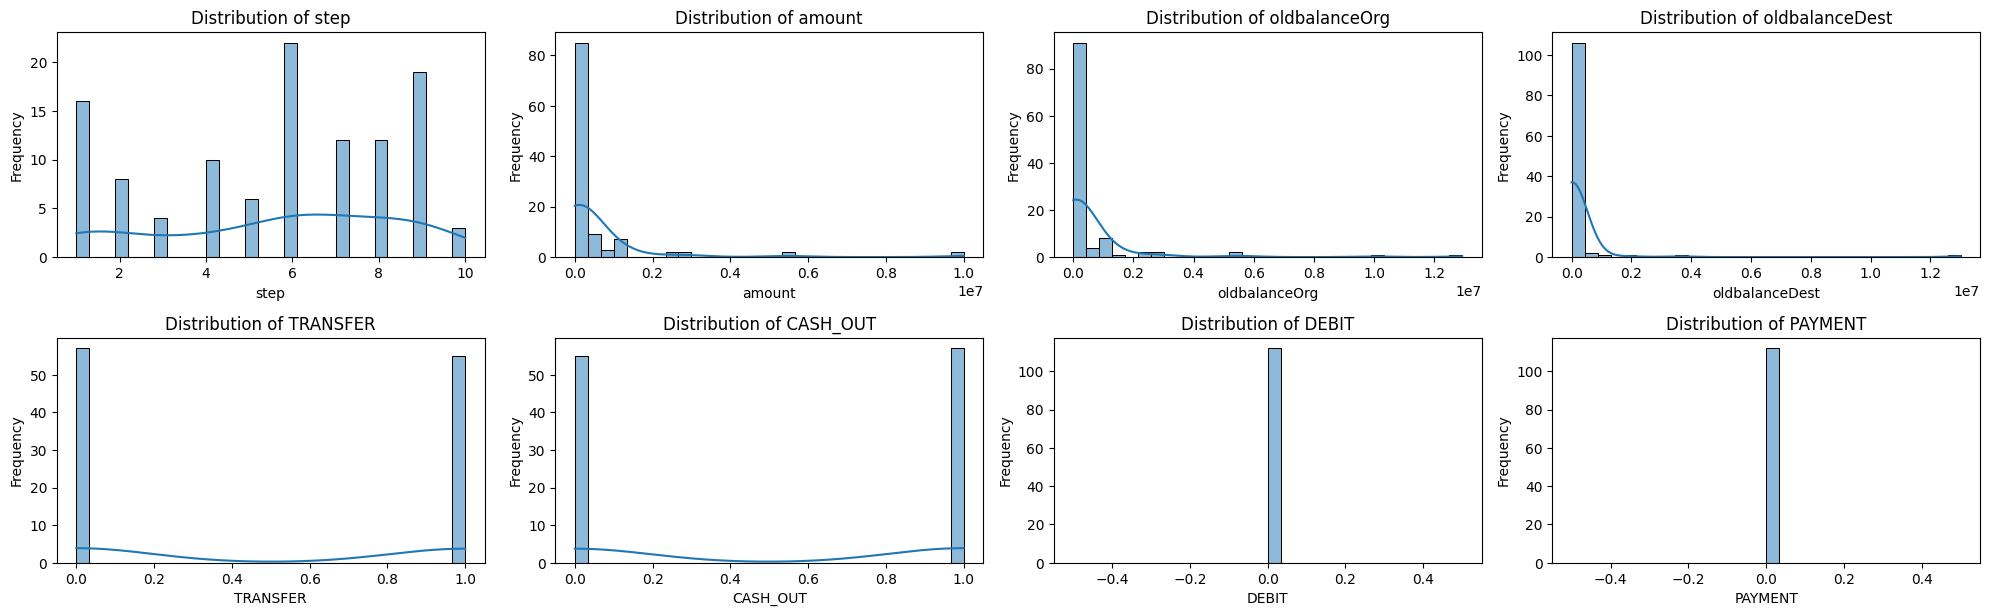

In [112]:
plt.figure(figsize=(20, 15))


for i, column in enumerate(fraud_data.columns, 1):
    if column == 'isFraud':
        continue

    plt.subplot(5, 4, i)
    sns.histplot(fraud_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


***Plotting Boxplot***

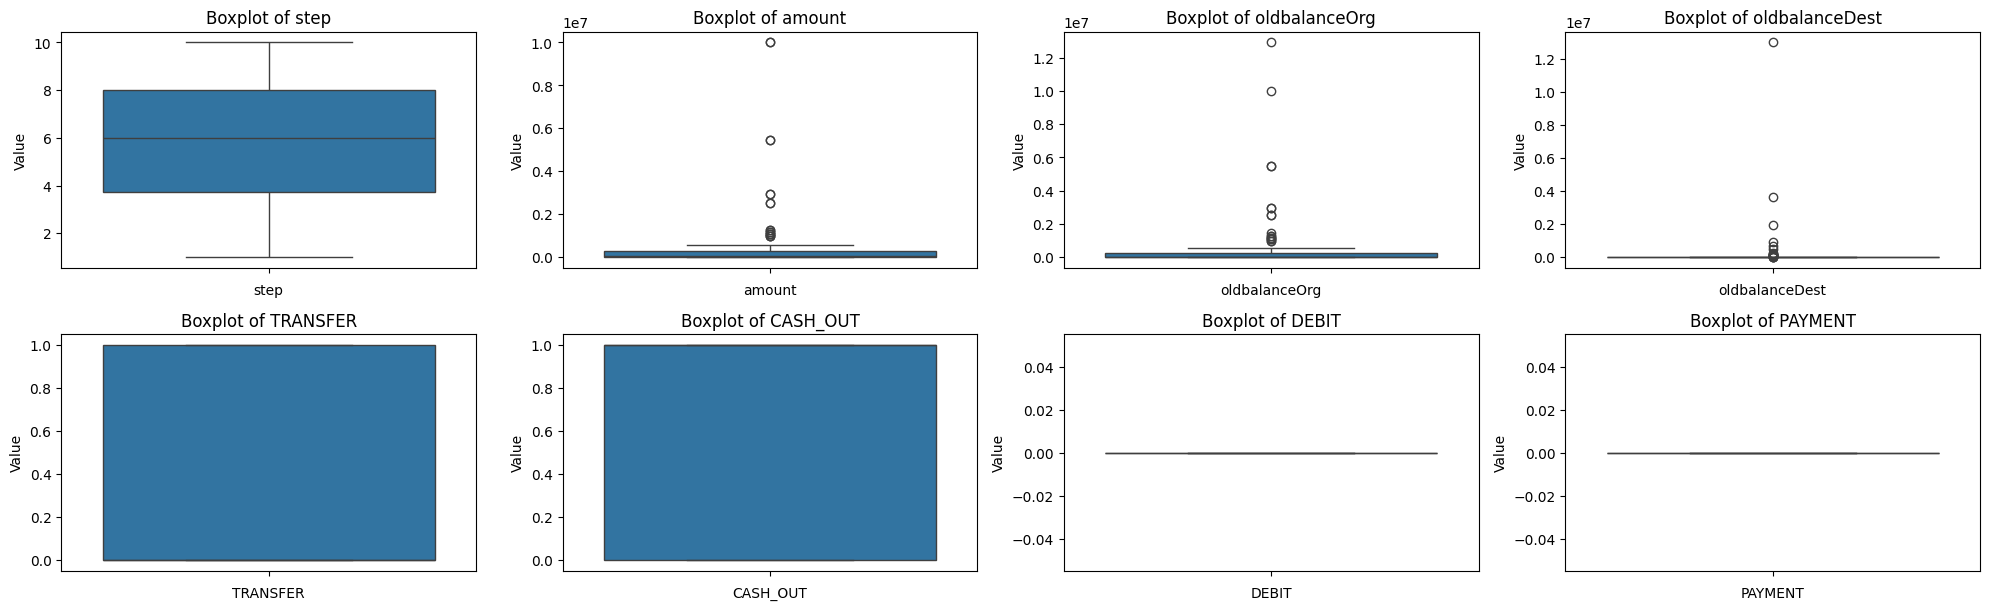

In [113]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(fraud_data.columns, 1):
    if column == 'isFraud':
        continue

    plt.subplot(5, 4, i)
    sns.boxplot(y=fraud_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


***Removing DEBIT and PAYMENT***

-> When we visualised the fraud transaction, we saw that there was not even a single transaction under DEBIT and PAYMENT which was a fraud

-> Hence we remove these 2 features in order to decrease the size of the dataset and increase the efficiency

In [114]:
data = data.drop(columns=['DEBIT','PAYMENT'])
fraud_data = fraud_data.drop(columns=['DEBIT','PAYMENT'])

In [115]:
data

,step,amount,oldbalanceOrg,oldbalanceDest,TRANSFER,CASH_OUT,isFraud
0,1,9839.64,170136.00,0.00,0.0,0.0,0.0
1,1,1864.28,21249.00,0.00,0.0,0.0,0.0
2,1,181.00,181.00,0.00,1.0,0.0,1.0
3,1,181.00,181.00,21182.00,0.0,1.0,1.0
4,1,11668.14,41554.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
83554,10,94566.08,664141.44,210704.60,0.0,1.0,0.0
83555,10,14895.17,51759.00,979963.09,0.0,1.0,0.0
83556,10,7705.70,96490.00,0.00,0.0,0.0,0.0
83557,10,319045.01,56471.00,0.00,0.0,1.0,0.0


In [116]:
fraud_data

,step,amount,oldbalanceOrg,oldbalanceDest,TRANSFER,CASH_OUT,isFraud
2,1,181.00,181.00,0.00,1.0,0.0,1.0
3,1,181.00,181.00,21182.00,0.0,1.0,1.0
251,1,2806.00,2806.00,0.00,1.0,0.0,1.0
252,1,2806.00,2806.00,26202.00,0.0,1.0,1.0
680,1,20128.00,20128.00,0.00,1.0,0.0,1.0
...,...,...,...,...,...,...,...
72510,9,244068.01,244068.01,0.00,1.0,0.0,1.0
72511,9,244068.01,244068.01,0.00,0.0,1.0,1.0
72930,10,59835.00,59835.00,0.00,1.0,0.0,1.0
72931,10,59835.00,59835.00,255480.76,0.0,1.0,1.0


#***Data Preprocessing***

##***Second Phase***

***Removing Outliers***

-> We will be removing outliers from the fraud_dataset (transactions classified as fraud)

-> Then we will be concatenating it with the rest of the data to produce cleaned_data

-> We are only removing outliers from fraud_data because this is only the important transaction that needs to be caught, while the outliers of the rest of the data should not be removed so that model can understand even those transactions can exist

In [117]:
def remove_outliers(df):
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

cleaned_fraud_data = remove_outliers(fraud_data)
non_fraud_data = data[data['isFraud'] == 0]
cleaned_data = pd.concat([cleaned_fraud_data, non_fraud_data])

In [118]:
cleaned_data

,step,amount,oldbalanceOrg,oldbalanceDest,TRANSFER,CASH_OUT,isFraud
2,1,181.00,181.00,0.00,1.0,0.0,1.0
3,1,181.00,181.00,21182.00,0.0,1.0,1.0
251,1,2806.00,2806.00,0.00,1.0,0.0,1.0
252,1,2806.00,2806.00,26202.00,0.0,1.0,1.0
680,1,20128.00,20128.00,0.00,1.0,0.0,1.0
...,...,...,...,...,...,...,...
83554,10,94566.08,664141.44,210704.60,0.0,1.0,0.0
83555,10,14895.17,51759.00,979963.09,0.0,1.0,0.0
83556,10,7705.70,96490.00,0.00,0.0,0.0,0.0
83557,10,319045.01,56471.00,0.00,0.0,1.0,0.0


# ***Artificial Neural Network***

***Importing Libraries***

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

***Splitting of dataset***

In [120]:
from sklearn.model_selection import train_test_split
x=cleaned_data.drop(['isFraud'],axis=1)
y=cleaned_data['isFraud']

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [122]:
train_data=x_train.join(y_train)
test_data=x_test.join(y_test)

***Scaling the features***

In [123]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

***Training the model***

In [124]:
model = Sequential()

#input layer + first hidden layer
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

#hidden layers
model.add(Dense(32, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

#compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#training
history = model.fit(x_train, y_train, epochs=32, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9844 - loss: 2177.5300 - val_accuracy: 0.9993 - val_loss: 1.7997
Epoch 2/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9978 - loss: 5.4855 - val_accuracy: 0.9993 - val_loss: 2.5294
Epoch 3/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9986 - loss: 4.3897 - val_accuracy: 0.9993 - val_loss: 0.4057
Epoch 4/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9986 - loss: 2.0961 - val_accuracy: 0.9993 - val_loss: 6.8051
Epoch 5/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 8.1394 - val_accuracy: 0.9993 - val_loss: 1.0016
Epoch 6/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9976 - loss: 11.9363 - val_accuracy: 0.9993 - val_loss: 0.2672
Epoch 7/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9980 - loss: 5.6301 - val_accuracy: 0.9993 - val_loss: 4.9455
Epoch 8/32
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9973 - loss: 5.808

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_pred_prob = model.predict(x_test)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")


precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print(classification_report(y_test, y_pred_classes))

Accuracy: 99.91%
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Unde

Precision: 0.00
Recall: 0.00
F1-Score: 0.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13328
         1.0       0.00      0.00      0.00        12

    accuracy                           1.00     13340
   macro avg       0.50      0.50      0.50     13340
weighted avg       1.00      1.00      1.00     13340

